In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [44]:
df=sns.load_dataset('tips')

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
df.shape

(244, 8)

In [55]:
df['z-score-total_bill']=zscore(df['total_bill'])

In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,z-score-total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [57]:
df[(df['z-score-total_bill'] >3) |
  (df['z-score-total_bill'] <-3)]

,total_bill,tip,sex,smoker,day,time,size,z-score-total_bill
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


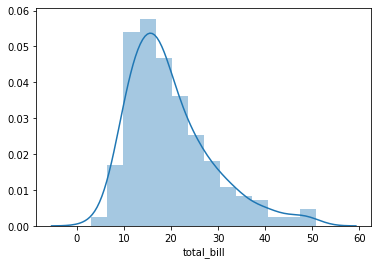

In [58]:
# create density ,skewennes,kurtosis with outlier and withour outlier
sns.distplot(df['total_bill'])
plt.show()

In [59]:
df['total_bill'].skew()

1.1332130376158205

In [52]:
df['total_bill'].kurtosis()

1.2184840156638854

In [60]:
df2=df[(df['z-score-total_bill'] <=3) &
  (df['z-score-total_bill'] >= -33)]

In [61]:
df2.shape

(240, 8)

In [62]:
df2['total_bill'].skew()

0.9148510261489988

In [63]:
df2['total_bill'].kurtosis()

0.5355590055930715

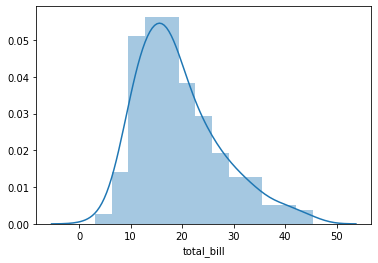

In [64]:
sns.distplot(df2['total_bill'])
plt.show()

In [36]:
df.drop(59,inplace=True)

In [37]:
df.drop(212,inplace=True)
df.drop(156,inplace=True)
df.drop(170,inplace=True)

In [40]:
df['total_bill'].skew()


0.9148510261489988

In [41]:
df['total_bill'].kurtosis()

0.5355590055930715

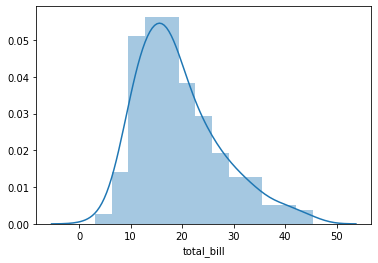

In [42]:
sns.distplot(df['total_bill'])

# Empirical rule

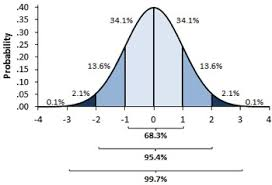

In [76]:
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [77]:
q1=df['total_bill'].describe()['25%']

In [78]:
q3=df['total_bill'].describe()['75%']

In [85]:
iqr=q3-q1
iqr

10.779999999999998

In [80]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [82]:
df2=df[(df['total_bill']>ul) |
       (df['total_bill']<ll)]
df2

,total_bill,tip,sex,smoker,day,time,size,z-score-total_bill
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.877490
184,40.55,3.00,Male,Yes,Sun,Dinner,2,2.337202
197,43.11,5.00,Female,Yes,Thur,Lunch,4,2.625356
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [84]:
df3=df[(df['total_bill']<=ul) &
       (df['total_bill']>=ll)]
df3.shape

(235, 8)

In [86]:
df3['total_bill'].skew(
)

0.7255976389840281

In [87]:
df3['total_bill'].kurtosis(
)

0.050898514819063934

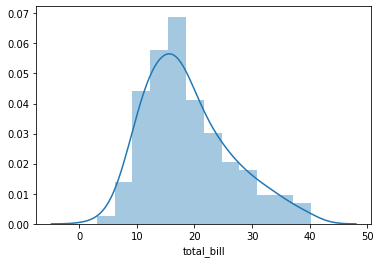

In [89]:
sns.distplot(df3['total_bill'])
plt.show()

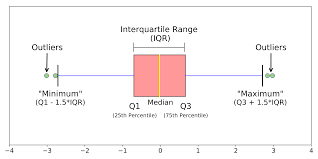